# Modelagem inicial



# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import RegressionExperiment

# Load dataset

In [2]:
data = pd.read_parquet("data/processed/df_model.parquet")

# Setup model

In [3]:

s = RegressionExperiment()
s.setup(
    data, 
    session_id = 123,
    target = 'qualidade_global_media_dada_pela_equipe_', 
    categorical_features = ['laboratorio', 'fora_de_tipo_x_tipo_unico'],
    transformation = True,
    transformation_method = 'yeo-johnson',
    transform_target = True,
    transform_target_method = 'yeo-johnson',
    log_experiment = True,
    experiment_name = 'CoffeeTree',
)

,Description,Value
0,Session id,123
1,Target,qualidade_global_media_dada_pela_equipe_
2,Target type,Regression
3,Original data shape,"(626, 35)"
4,Transformed data shape,"(626, 37)"
5,Transformed train set shape,"(438, 37)"
6,Transformed test set shape,"(188, 37)"
7,Numeric features,32
8,Categorical features,2
9,Preprocess,True


# Compare models

In [4]:
s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1315,0.0577,0.2262,0.9608,0.0351,0.0245,0.0180
catboost,CatBoost Regressor,0.1386,0.0603,0.2334,0.9591,0.0353,0.0251,0.1400
rf,Random Forest Regressor,0.1321,0.0635,0.2318,0.9577,0.0356,0.0246,0.0200
lightgbm,Light Gradient Boosting Machine,0.1458,0.0712,0.2484,0.9526,0.0381,0.0270,0.2880
xgboost,Extreme Gradient Boosting,0.1433,0.0714,0.2497,0.9521,0.0380,0.0264,0.0110
gbr,Gradient Boosting Regressor,0.1455,0.0738,0.2552,0.9506,0.0391,0.0269,0.0140
br,Bayesian Ridge,0.1910,0.0777,0.2742,0.9472,0.0405,0.0336,0.0080
lr,Linear Regression,0.1898,0.0798,0.2765,0.9460,0.0406,0.0334,0.1740
ridge,Ridge Regression,0.2248,0.1037,0.3201,0.9294,0.0470,0.0392,0.0750
dt,Decision Tree Regressor,0.1818,0.1073,0.3096,0.9281,0.0475,0.0335,0.0080


2024/10/28 22:33:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/28 22:33:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/28 22:33:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/28 22:33:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/28 22:33:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/28 22:33:11 

ExtraTreesRegressor(n_jobs=-1, random_state=123)

# create model

## catboost

In [5]:
catboost = s.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1395,0.0611,0.2472,0.9576,0.0364,0.0245
1,0.1192,0.0618,0.2486,0.9582,0.0396,0.0217
2,0.1191,0.0271,0.1645,0.9824,0.0255,0.0212
3,0.1227,0.0279,0.1670,0.9825,0.0260,0.0228
4,0.0968,0.0202,0.1420,0.9847,0.0208,0.0172
5,0.1927,0.1524,0.3904,0.9051,0.0574,0.0350
6,0.1034,0.0193,0.1389,0.9877,0.0246,0.0213
7,0.1692,0.0672,0.2593,0.9460,0.0382,0.0293
8,0.1642,0.0748,0.2735,0.9521,0.0409,0.0291


2024/10/28 22:33:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## lightgbm

In [6]:
lightgbm = s.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1451,0.0599,0.2447,0.9584,0.0365,0.0260
1,0.1435,0.0811,0.2847,0.9452,0.0457,0.0261
2,0.1196,0.0303,0.1739,0.9803,0.0261,0.0207
3,0.1355,0.0369,0.1920,0.9769,0.0319,0.0264
4,0.0917,0.0196,0.1400,0.9851,0.0213,0.0167
5,0.2128,0.2418,0.4918,0.8494,0.0712,0.0407
6,0.1305,0.0303,0.1740,0.9806,0.0308,0.0264
7,0.1448,0.0419,0.2048,0.9663,0.0320,0.0267
8,0.1547,0.0611,0.2471,0.9609,0.0367,0.0273


2024/10/28 22:33:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## xgboost

In [7]:
xgboost = s.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1499,0.0725,0.2692,0.9497,0.0393,0.0263
1,0.1369,0.0723,0.2688,0.9511,0.0428,0.0253
2,0.1231,0.0316,0.1776,0.9794,0.0281,0.0224
3,0.1100,0.0256,0.1600,0.9839,0.0261,0.0211
4,0.1072,0.0218,0.1478,0.9834,0.0223,0.0192
5,0.2152,0.2293,0.4788,0.8572,0.0701,0.0414
6,0.1284,0.0329,0.1813,0.9790,0.0298,0.0254
7,0.1492,0.0516,0.2271,0.9586,0.0348,0.0270
8,0.1474,0.0588,0.2425,0.9623,0.0369,0.0261


2024/10/28 22:33:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# Tune models

## Tune catboost

In [8]:
tuned_catboost, tuned_catboost_tuner = s.tune_model(
    catboost, 
    search_library = 'optuna',
    return_tuner = True
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2064,0.1168,0.3418,0.9189,0.0482,0.0354
1,0.1750,0.0915,0.3025,0.9381,0.0480,0.0319
2,0.1456,0.0448,0.2117,0.9708,0.0323,0.0256
3,0.1637,0.0508,0.2254,0.9681,0.0350,0.0304
4,0.1304,0.0417,0.2042,0.9684,0.0297,0.0229
5,0.1804,0.1613,0.4017,0.8995,0.0578,0.0334
6,0.1548,0.0428,0.2068,0.9727,0.0340,0.0299
7,0.1942,0.0868,0.2946,0.9303,0.0444,0.0350
8,0.1862,0.0959,0.3096,0.9386,0.0477,0.0334


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2024/10/28 22:34:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [9]:
tuned_catboost_tuner

OptunaSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
               error_score='raise',
               estimator=Pipeline(memory=Memory(location=None),
                                  steps=[('target_transformation',
                                          TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                                         ('numerical_imputer',
                                          TransformerWrapper(include=['odor_do_po',
                                                                      '_docura',...
                                    'actual_estimator__l2_leaf_reg': IntDistribution(high=200, log=True, low=1, step=1),
                                    'actual_estimator__n_estimators': IntDistribution(high=300, log=False, low=10, step=1),
                                    'actual_estimator__random_strength': FloatDistribution(high=0.8, log=False, low=0.0, step=None)},
               random_state=123, refit=False, scoring='r2',
               study=<optuna.study.study.Study object at 0x372f71410>,
               verbose=1)

## Tune lightgbm

In [10]:
tuned_lightgbm, tuned_lightgbm_tuner = s.tune_model(
    lightgbm, 
    search_library = 'optuna',
    return_tuner = True
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0996,1.6903,1.3001,-0.1736,0.1872,0.1796
1,1.0145,1.5297,1.2368,-0.0349,0.1790,0.1740
2,1.0165,1.7004,1.3040,-0.1079,0.1816,0.1613
3,1.1202,1.6724,1.2932,-0.0495,0.1906,0.1952
4,0.9675,1.3767,1.1733,-0.0447,0.1677,0.1624
5,1.0490,1.7073,1.3066,-0.0631,0.1855,0.1729
6,1.0622,1.5673,1.2519,-0.0015,0.1866,0.1957
7,0.9852,1.3214,1.1495,-0.0616,0.1685,0.1697
8,1.0957,1.6906,1.3002,-0.0828,0.1862,0.1828


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8633175708164029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8633175708164029
[LightGBM] [Warning] bagging_fraction is set=0.40447178913151594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40447178913151594
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8633175708164029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8633175708164029
[LightGBM] [Warning] bagging_fraction is set=0.40447178913151594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40447178913151594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

2024/10/28 22:34:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [11]:
tuned_lightgbm_tuner

OptunaSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
               error_score='raise',
               estimator=Pipeline(memory=Memory(location=None),
                                  steps=[('target_transformation',
                                          TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                                         ('numerical_imputer',
                                          TransformerWrapper(include=['odor_do_po',
                                                                      '_docura',...
                                    'actual_estimator__num_leaves': IntDistribution(high=256, log=False, low=2, step=1),
                                    'actual_estimator__reg_alpha': FloatDistribution(high=10.0, log=True, low=1e-10, step=None),
                                    'actual_estimator__reg_lambda': FloatDistribution(high=10.0, log=True, low=1e-10, step=None)},
               random_state=123, refit=False, scoring='r2',
               study=<optuna.study.study.Study object at 0x38b761d10>,
               verbose=1)

## Tune xgboost

In [12]:
tuned_xgboost, tuned_xgboost_tuner = s.tune_model(
    xgboost, 
    search_library = 'optuna',
    return_tuner = True
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1281,0.0480,0.2190,0.9667,0.0327,0.0227
1,0.1363,0.0706,0.2657,0.9522,0.0424,0.0251
2,0.1086,0.0269,0.1639,0.9825,0.0248,0.0191
3,0.1082,0.0228,0.1510,0.9857,0.0259,0.0212
4,0.0967,0.0220,0.1483,0.9833,0.0214,0.0167
5,0.1977,0.2035,0.4511,0.8733,0.0648,0.0367
6,0.1048,0.0255,0.1597,0.9837,0.0286,0.0215
7,0.1479,0.0467,0.2161,0.9625,0.0340,0.0270
8,0.1560,0.0718,0.2680,0.9540,0.0401,0.0274


2024/10/28 22:35:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [13]:
tuned_xgboost_tuner

OptunaSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
               error_score='raise',
               estimator=Pipeline(memory=Memory(location=None),
                                  steps=[('target_transformation',
                                          TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                                         ('numerical_imputer',
                                          TransformerWrapper(include=['odor_do_po',
                                                                      '_docura',...
                                    'actual_estimator__reg_lambda': FloatDistribution(high=10.0, log=True, low=1e-10, step=None),
                                    'actual_estimator__scale_pos_weight': FloatDistribution(high=50.0, log=False, low=1.0, step=None),
                                    'actual_estimator__subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None)},
               random_state=123, refit=False, scoring='r2',
               study=<optuna.study.study.Study object at 0x38b73d690>,
               verbose=1)

# Analyze models

## Catboost

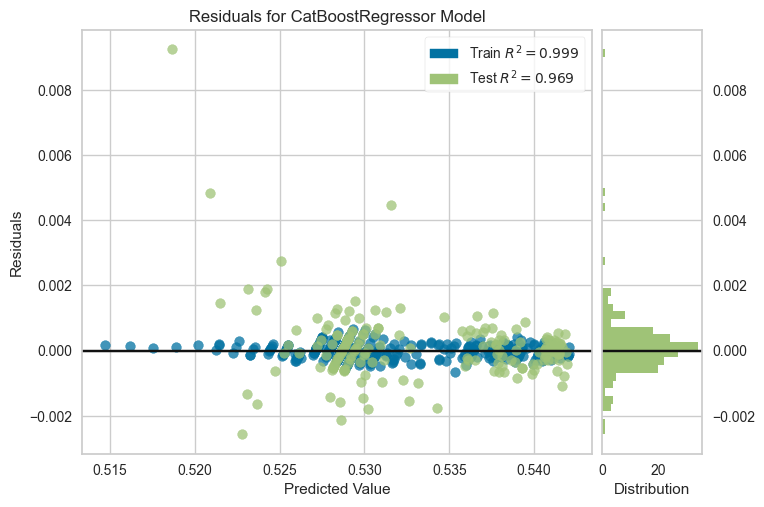

In [14]:
s.plot_model(tuned_catboost, plot = 'residuals')

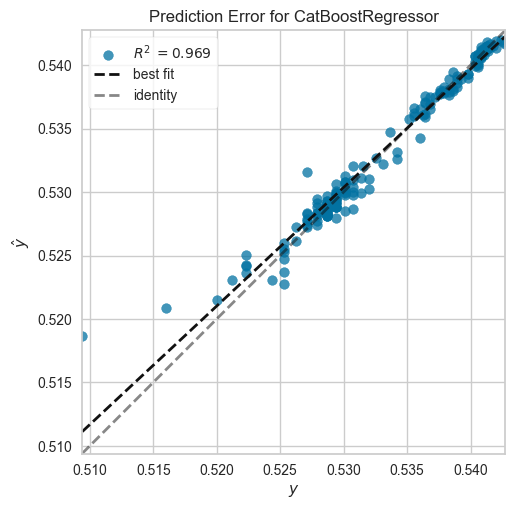

In [15]:
s.plot_model(tuned_catboost, plot = 'error')

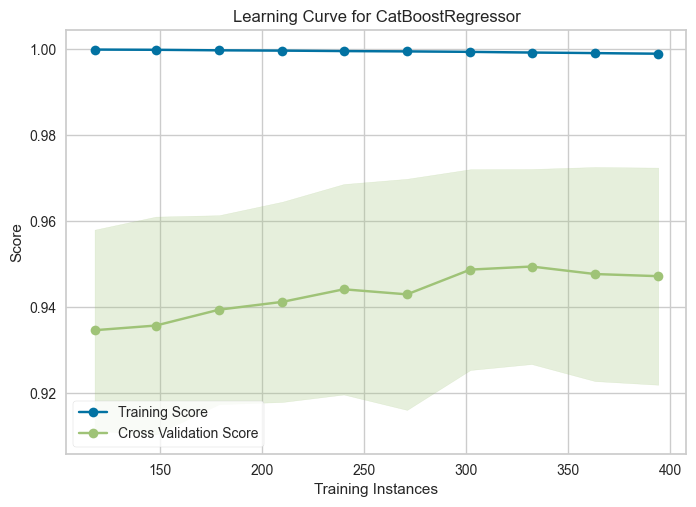

In [16]:
s.plot_model(tuned_catboost, plot = 'learning')


## Lightgbm

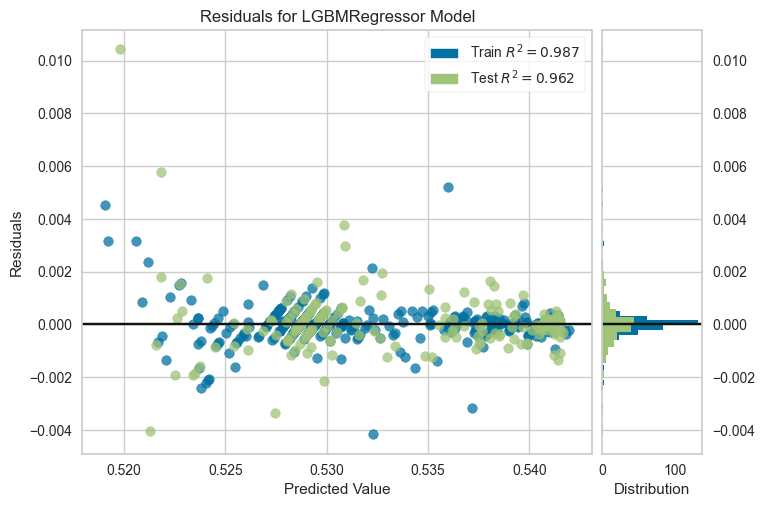

In [17]:
s.plot_model(tuned_lightgbm, plot = 'residuals')

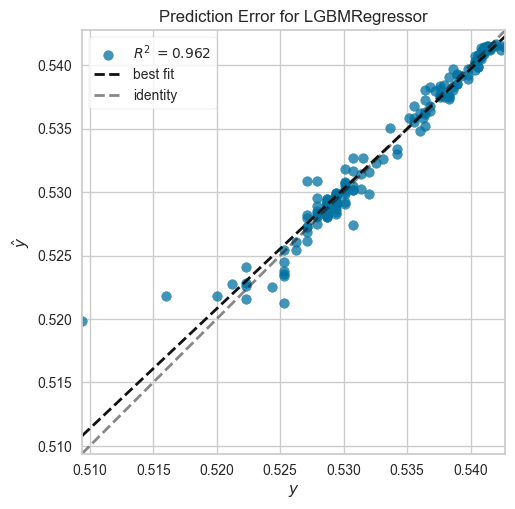

In [18]:
s.plot_model(tuned_lightgbm, plot = 'error')

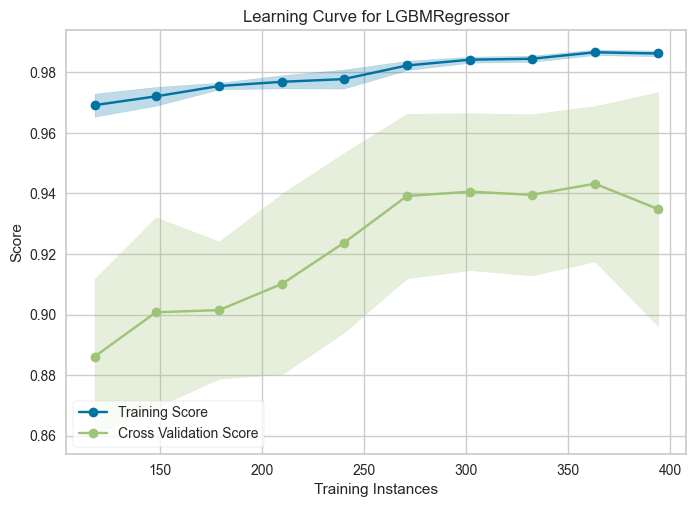

In [19]:
s.plot_model(tuned_lightgbm, plot = 'learning')


## Xgboost

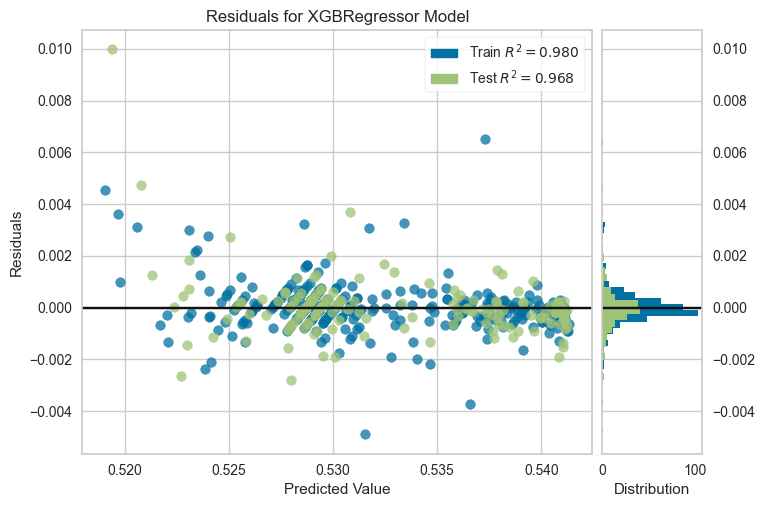

In [20]:
s.plot_model(tuned_xgboost, plot = 'residuals')

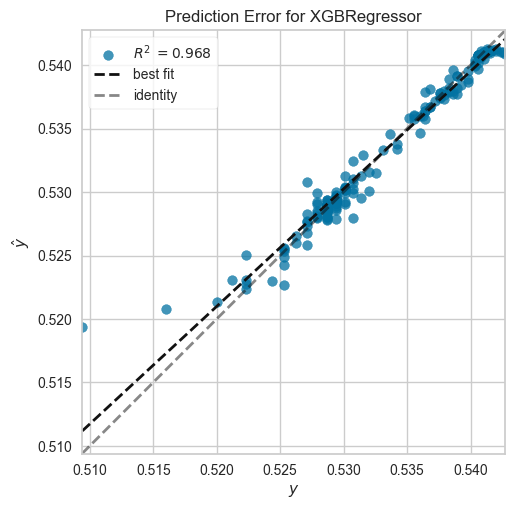

In [21]:
s.plot_model(tuned_xgboost, plot = 'error')

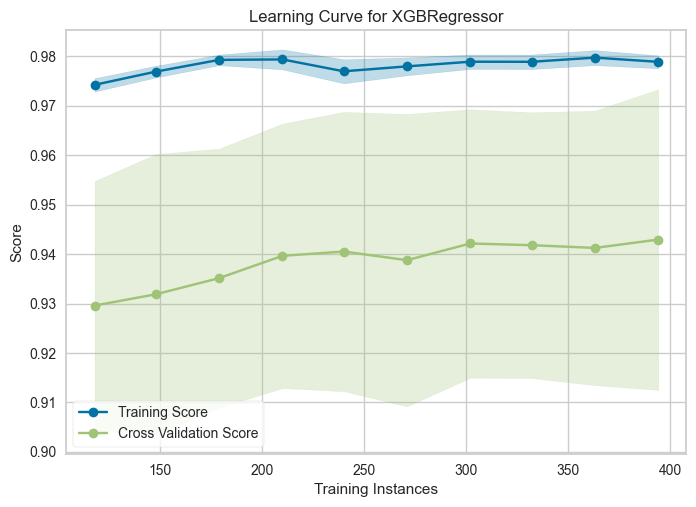

In [22]:
s.plot_model(tuned_xgboost, plot = 'learning')

# Interpret models

## Catboost

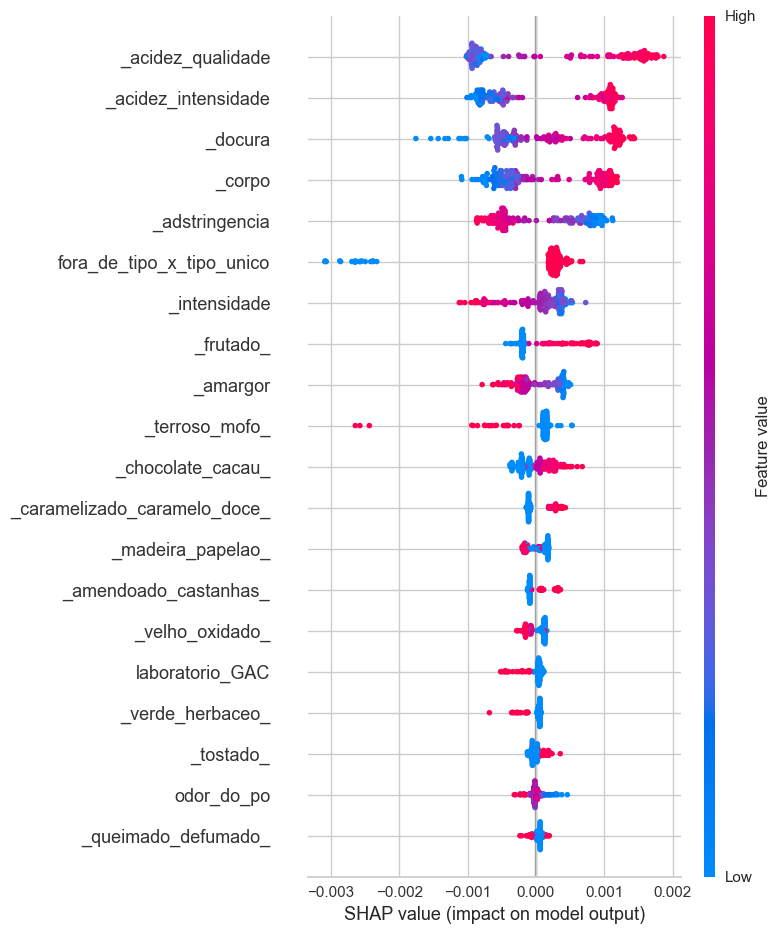

In [23]:
s.interpret_model(tuned_catboost)

## Lightgbm

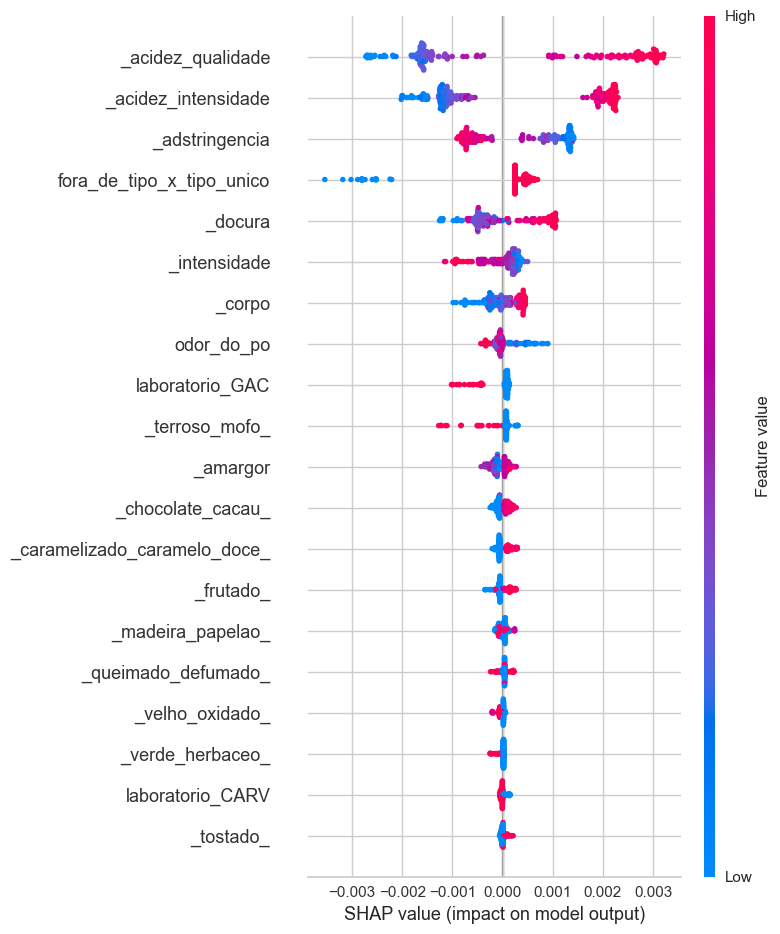

In [24]:
s.interpret_model(tuned_lightgbm)

## Xgboost

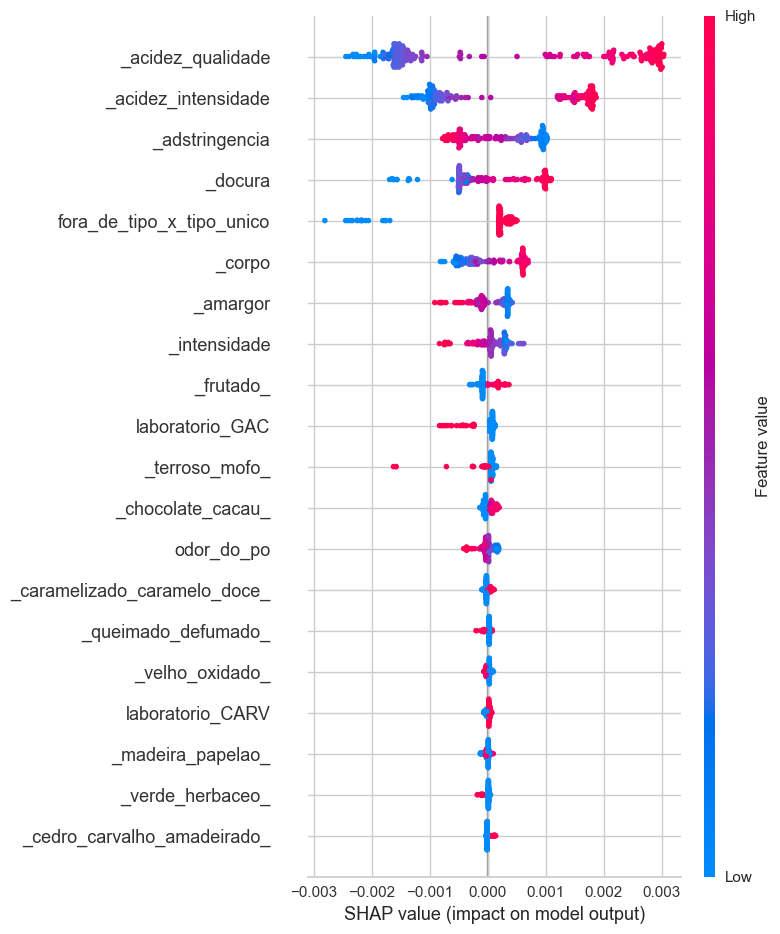

In [25]:
s.interpret_model(tuned_xgboost)